In [3]:
from __future__ import absolute_import, division, print_function

import numpy as np
%load_ext autoreload
%autoreload 2

import sys, os
script_dir  = os.path.normpath(os.path.abspath("."))
root_dir    = os.path.normpath(os.path.abspath(script_dir + "/../.."))
if root_dir in sys.path: sys.path.remove(root_dir)
sys.path.insert(1, root_dir)

import warnings
warnings.filterwarnings("ignore")

In [4]:
import glob, pandas as pd
import tqdm, numpy as np
from IPython import display
import cv2
import matplotlib.pyplot as plt

In [5]:
data_root = f'{root_dir}/data/AI_competition'
prep_root = f'{data_root}/preprocessed'
df_full = pd.read_excel(f'{prep_root}/full_info.xlsx')

197


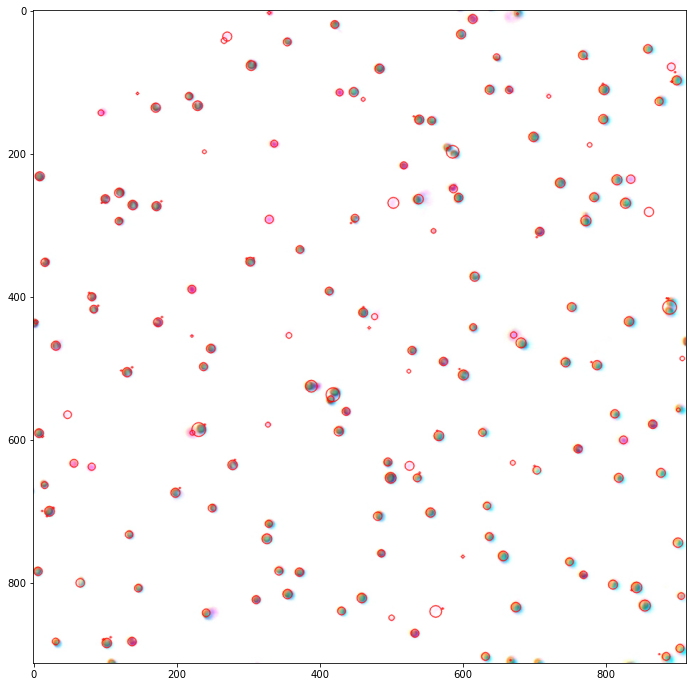

In [43]:
def init_blob_detector():
    params = cv2.SimpleBlobDetector_Params()
    params.minThreshold = 0
    params.maxThreshold = 255
    params.filterByArea = True
    params.minArea = 1
    params.filterByCircularity = False
    params.filterByConvexity = False
    params.filterByInertia = False
    detector = cv2.SimpleBlobDetector_create(params)
    return detector
    pass # init_blob_detector

def detect_cells(image, verbose = 1):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    gray = clahe.apply(gray)

    detector = init_blob_detector()
    blobs = detector.detect(gray)

    if verbose == 1:
        image_blob = cv2.drawKeypoints(image, blobs,
                                       np.array([]), (255,0,0),
                                       cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        plt.figure(figsize=(12,12))
        print(len(blobs))
        plt.imshow(image_blob)
        plt.show()

    return blobs
    pass # detect_cells

fcode      = '2-1-1-2-2-1001-0120126'
image_info = df_full.query(f'fcode=="{fcode}"')
image_info["fpath"].values[0]

image_path = f'{data_root}/{image_info["fpath"].values[0]}'
# image_path = f'{root_dir}/data/water_coins.jpg'
image = cv2.imread(image_path)
blobs = detect_cells(image)

In [46]:
df_ncells = []
for idx in tqdm.tqdm(range(len(df_full))):
    info = df_full.iloc[idx]
    if pd.isna(info["fpath"]) == False and  info["fpath"] != "":
        image_path = f'{data_root}/{info["fpath"]}'
        image = cv2.imread(image_path)
        blobs = detect_cells(image, verbose = 0)
        n_cell = len(blobs)
        df_ncells.append(n_cell)
    else:
        df_ncells.append(-1)
    pass

100%|██████████| 123818/123818 [47:02<00:00, 43.86it/s]  


In [60]:
df_full

,index,ccode,cdate,ID CODE,Temperatue,DO,pH,salinity,NTU,fcode,fdate,fplace,fpath
0,2-1-1-2-2-1001-0110011,2-1-1-1-1-1001-0010000,10/01,2-1-1-2-2-1001-0110011,23.65,7.08,8.39,31.75,2.95,2-1-1-2-2-1001-0110011,10/01,일해,먹이생물/10월01일/일해/2-1-1-2-2-1001-0110011.jpg
1,2-1-1-2-2-1001-0110012,2-1-1-1-1-1001-0010000,10/01,2-1-1-2-2-1001-0110012,23.65,7.08,8.39,31.75,2.95,2-1-1-2-2-1001-0110012,10/01,일해,먹이생물/10월01일/일해/2-1-1-2-2-1001-0110012.jpg
2,2-1-1-2-2-1001-0110013,2-1-1-1-1-1001-0010000,10/01,2-1-1-2-2-1001-0110013,23.65,7.08,8.39,31.75,2.95,2-1-1-2-2-1001-0110013,10/01,일해,먹이생물/10월01일/일해/2-1-1-2-2-1001-0110013.jpg
3,2-1-1-2-2-1001-0110014,2-1-1-1-1-1001-0010000,10/01,2-1-1-2-2-1001-0110014,23.65,7.08,8.39,31.75,2.95,2-1-1-2-2-1001-0110014,10/01,일해,먹이생물/10월01일/일해/2-1-1-2-2-1001-0110014.jpg
4,2-1-1-2-2-1001-0110015,2-1-1-1-1-1001-0010000,10/01,2-1-1-2-2-1001-0110015,23.65,7.08,8.39,31.75,2.95,2-1-1-2-2-1001-0110015,10/01,일해,먹이생물/10월01일/일해/2-1-1-2-2-1001-0110015.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123813,2-1-1-2-2-1029-0526002,2-1-1-1-1-1029-0020000,10/29,2-1-1-2-2-1029-0526002,25.02,8.40,9.18,34.35,8.71,2-1-1-2-2-1029-0526002,10/29,고성,먹이생물/10월29일/고성/2-1-1-2-2-1029-0526002.jpg
123814,2-1-1-2-2-1029-0526003,2-1-1-1-1-1029-0020000,10/29,2-1-1-2-2-1029-0526003,25.02,8.40,9.18,34.35,8.71,2-1-1-2-2-1029-0526003,10/29,고성,먹이생물/10월29일/고성/2-1-1-2-2-1029-0526003.jpg
123815,2-1-1-2-2-1029-0526004,2-1-1-1-1-1029-0020000,10/29,2-1-1-2-2-1029-0526004,25.02,8.40,9.18,34.35,8.71,2-1-1-2-2-1029-0526004,10/29,고성,먹이생물/10월29일/고성/2-1-1-2-2-1029-0526004.jpg
123816,2-1-1-2-2-1029-0526005,2-1-1-1-1-1029-0020000,10/29,2-1-1-2-2-1029-0526005,25.02,8.40,9.18,34.35,8.71,2-1-1-2-2-1029-0526005,10/29,고성,먹이생물/10월29일/고성/2-1-1-2-2-1029-0526005.jpg


In [49]:
df_ncells = np.array(df_ncells)

In [76]:
df_full_cell = df_full[["index"]]
for colname in ["cdate", "ID CODE", "Temperatue", "DO", "pH", "salinity", "NTU", "fcode", "fdate", "fplace", "fpath"]:
    df_full_cell[colname] = df_full[colname]
df_full_cell["ncells"] = df_ncells
df_full_cell.to_excel(f'{prep_root}/full_cell_info.xlsx', index=False)

In [77]:
df_full_cell

,index,cdate,ID CODE,Temperatue,DO,pH,salinity,NTU,fcode,fdate,fplace,fpath,ncells
0,2-1-1-2-2-1001-0110011,10/01,2-1-1-2-2-1001-0110011,23.65,7.08,8.39,31.75,2.95,2-1-1-2-2-1001-0110011,10/01,일해,먹이생물/10월01일/일해/2-1-1-2-2-1001-0110011.jpg,6
1,2-1-1-2-2-1001-0110012,10/01,2-1-1-2-2-1001-0110012,23.65,7.08,8.39,31.75,2.95,2-1-1-2-2-1001-0110012,10/01,일해,먹이생물/10월01일/일해/2-1-1-2-2-1001-0110012.jpg,11
2,2-1-1-2-2-1001-0110013,10/01,2-1-1-2-2-1001-0110013,23.65,7.08,8.39,31.75,2.95,2-1-1-2-2-1001-0110013,10/01,일해,먹이생물/10월01일/일해/2-1-1-2-2-1001-0110013.jpg,7
3,2-1-1-2-2-1001-0110014,10/01,2-1-1-2-2-1001-0110014,23.65,7.08,8.39,31.75,2.95,2-1-1-2-2-1001-0110014,10/01,일해,먹이생물/10월01일/일해/2-1-1-2-2-1001-0110014.jpg,9
4,2-1-1-2-2-1001-0110015,10/01,2-1-1-2-2-1001-0110015,23.65,7.08,8.39,31.75,2.95,2-1-1-2-2-1001-0110015,10/01,일해,먹이생물/10월01일/일해/2-1-1-2-2-1001-0110015.jpg,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123813,2-1-1-2-2-1029-0526002,10/29,2-1-1-2-2-1029-0526002,25.02,8.40,9.18,34.35,8.71,2-1-1-2-2-1029-0526002,10/29,고성,먹이생물/10월29일/고성/2-1-1-2-2-1029-0526002.jpg,10
123814,2-1-1-2-2-1029-0526003,10/29,2-1-1-2-2-1029-0526003,25.02,8.40,9.18,34.35,8.71,2-1-1-2-2-1029-0526003,10/29,고성,먹이생물/10월29일/고성/2-1-1-2-2-1029-0526003.jpg,5
123815,2-1-1-2-2-1029-0526004,10/29,2-1-1-2-2-1029-0526004,25.02,8.40,9.18,34.35,8.71,2-1-1-2-2-1029-0526004,10/29,고성,먹이생물/10월29일/고성/2-1-1-2-2-1029-0526004.jpg,17
123816,2-1-1-2-2-1029-0526005,10/29,2-1-1-2-2-1029-0526005,25.02,8.40,9.18,34.35,8.71,2-1-1-2-2-1029-0526005,10/29,고성,먹이생물/10월29일/고성/2-1-1-2-2-1029-0526005.jpg,17


In [78]:
!jupyter nbconvert 02_cell_counts.ipynb --to html

[NbConvertApp] Converting notebook 02_cell_counts.ipynb to html
[NbConvertApp] Writing 750547 bytes to 02_cell_counts.html
